**Mini Project G.231.22.0118**

**Studi Kasus dari Senja: Daily number of customers on Desember**

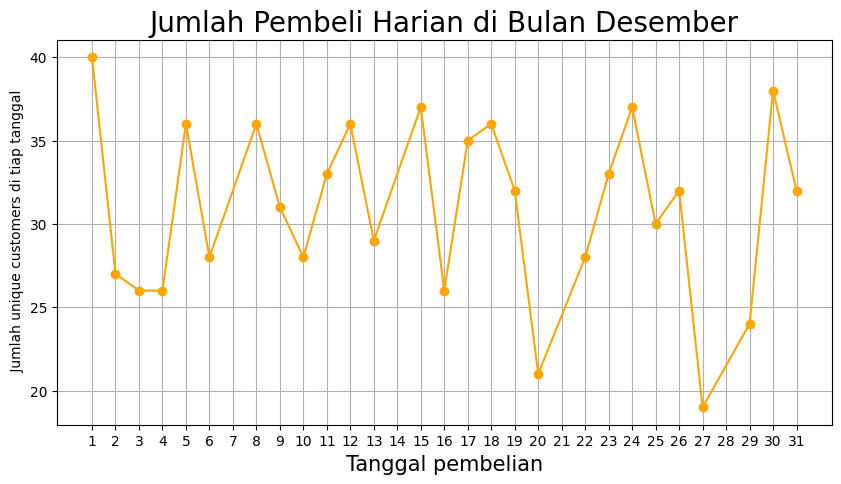

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset penjualan
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
dataset = pd.read_csv(url)

# Mengubah kolom 'order_date' menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter data hanya untuk bulan Desember
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah pembeli harian (daily number of customers) di bulan Desember
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart untuk jumlah pembeli harian di bulan Desember
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='o',color='orange')
plt.xlabel('Tanggal pembelian',fontsize=15,color='black')
plt.ylabel(' Jumlah unique customers di tiap tanggal',fontsize=10,color='black')
plt.title('Jumlah Pembeli Harian di Bulan Desember',fontsize=20)
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

**Case 1: Menentukan brand top 5**

In [ ]:
import pandas as pd

# Memuat dataset penjualan
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
dataset = pd.read_csv(url)

# Mengubah kolom 'tanggal' menjadi tipe data datetime
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

# Mengambil data penjualan bulan Desember 2019
december_data = dataset[(dataset['order_date'].dt.year == 2019) & (dataset['order_date'].dt.month == 12)]

# Menghitung jumlah produk terjual per brand
brand_product_count = december_data.groupby('brand')['quantity'].sum().reset_index()

# Mengurutkan berdasarkan jumlah produk terjual
brand_product_count_sorted = brand_product_count.sort_values('quantity', ascending=False)

# Menampilkan brand top 5 dengan jumlah produk terjual
top_5_brands = brand_product_count_sorted.head(5)

# Menampilkan brand top 5 dengan jumlah produk terjual
print("Penjualan Top 5 Brand:")
print(top_5_brands)


Penjualan Top 5 Brand:
     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


**Case 2: Multi-line chart daily quantity untuk brand top 5**

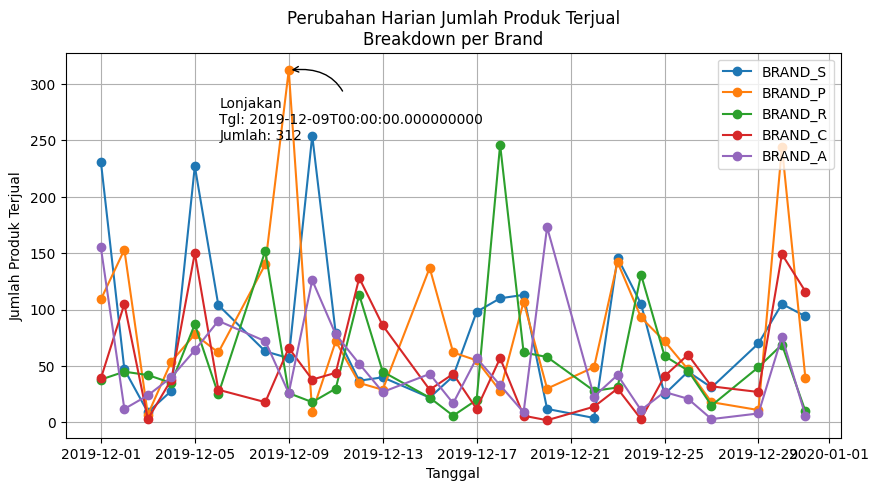

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset penjualan
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
dataset = pd.read_csv(url)

# Mengubah kolom 'tanggal' menjadi tipe data datetime
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

# Mengambil data penjualan bulan Desember 2019
december_data = dataset[(dataset['order_date'].dt.year == 2019) & (dataset['order_date'].dt.month == 12)]

# Menghitung jumlah produk terjual per brand per hari
daily_product_count = december_data.groupby(['order_date', 'brand'])['quantity'].sum().reset_index()

# Mengurutkan brand berdasarkan total penjualan secara menurun
brand_product_count_sorted = daily_product_count.groupby('brand')['quantity'].sum().sort_values(ascending=False).index

# Mengambil top 5 brand dengan jumlah produk terjual tertinggi
top_5_brands = brand_product_count_sorted[:5]

# Membuat multi-line chart
plt.figure(figsize=(10, 5))
for brand in top_5_brands:
    brand_data = daily_product_count[daily_product_count['brand'] == brand]
    plt.plot(brand_data['order_date'], brand_data['quantity'], marker='o', label=brand)

# Mencari tanggal dengan lonjakan jumlah produk
max_quantity_date = daily_product_count[daily_product_count['quantity'] == daily_product_count['quantity'].max()]['order_date'].values[0]
max_quantity = daily_product_count[daily_product_count['quantity'] == daily_product_count['quantity'].max()]['quantity'].values[0]

# Menambahkan anotasi pada titik lonjakan
plt.annotate(f'Lonjakan\nTgl: {max_quantity_date}\nJumlah: {max_quantity}',
             xy=(max_quantity_date, max_quantity), xycoords='data',
             xytext=(-50, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5"))

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Produk Terjual')
plt.title('Perubahan Harian Jumlah Produk Terjual\nBreakdown per Brand')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


**Case 3**

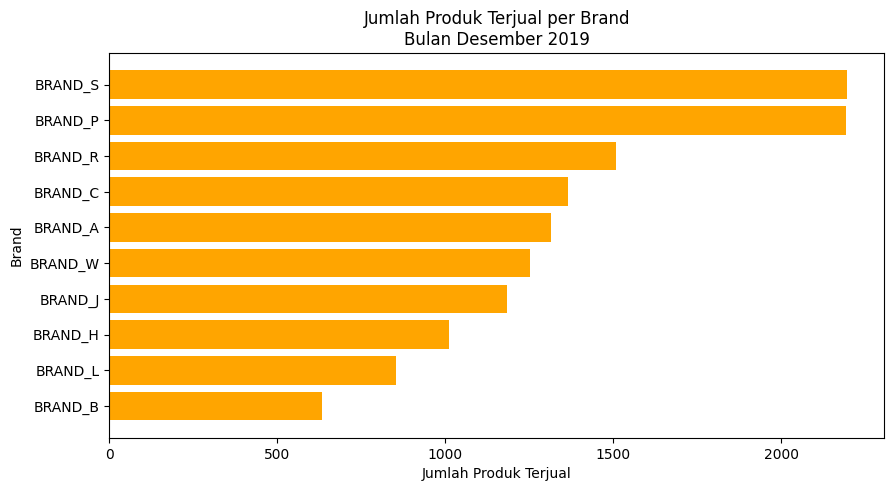

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset penjualan
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
dataset = pd.read_csv(url)

# Mengubah kolom 'tanggal' menjadi tipe data datetime
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

# Mengambil data penjualan bulan Desember 2019
december_data = dataset[(dataset['order_date'].dt.year == 2019) & (dataset['order_date'].dt.month == 12)]

# Menghitung jumlah produk terjual per brand
brand_product_count = december_data.groupby('brand')['quantity'].sum().reset_index()

# Mengurutkan berdasarkan jumlah produk terjual secara menaik
brand_product_count_sorted = brand_product_count.sort_values('quantity')

# Membuat visualisasi barchart
plt.figure(figsize=(10, 5))
plt.barh(brand_product_count_sorted['brand'], brand_product_count_sorted['quantity'],color='orange')
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Brand')
plt.title('Jumlah Produk Terjual per Brand\nBulan Desember 2019')
plt.show()


**Case 4: Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019**

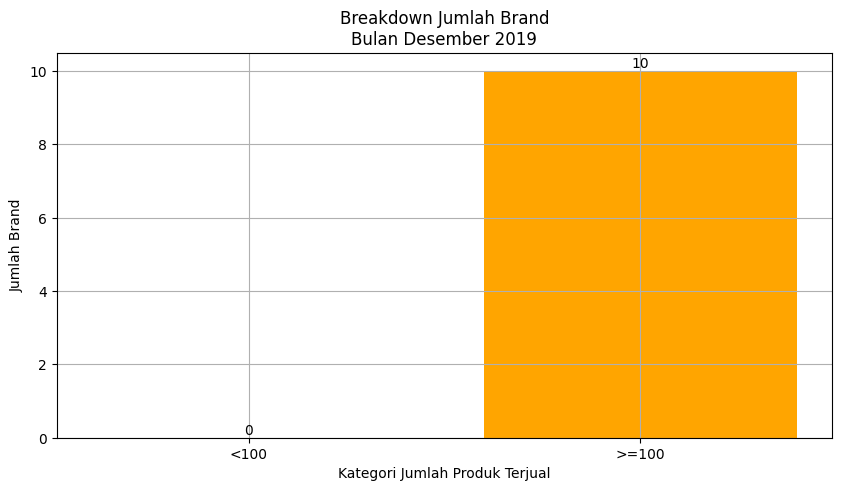

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset penjualan
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
dataset = pd.read_csv(url)

# Mengubah kolom 'tanggal' menjadi tipe data datetime
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

# Mengambil data penjualan bulan Desember 2019
december_data = dataset[(dataset['order_date'].dt.year == 2019) & (dataset['order_date'].dt.month == 12)]

# Menghitung jumlah produk terjual per brand
brand_product_count = december_data.groupby('brand')['quantity'].sum().reset_index()

# Mengelompokkan berdasarkan kategori jumlah produk terjual
brand_product_count['jumlah_produk'] = pd.cut(brand_product_count['quantity'], bins=[0, 100, float('inf')], labels=['<100', '>=100'])

# Menghitung jumlah produk terjual berdasarkan kategori
product_category_count = brand_product_count.groupby(['jumlah_produk'])['brand'].count().reset_index()

# Membuat visualisasi stacked chart
plt.figure(figsize=(10, 5))
plt.bar(product_category_count['jumlah_produk'], product_category_count['brand'], color=['orange'])
plt.xlabel('Kategori Jumlah Produk Terjual')
plt.ylabel('Jumlah Brand')
plt.title('Breakdown Jumlah Brand\nBulan Desember 2019')
plt.grid(True)

# Menambahkan label pada setiap bar
for i, val in enumerate(product_category_count['brand']):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.show()


**Case 5: Murah atau mahalkah harga produk brand top 5**

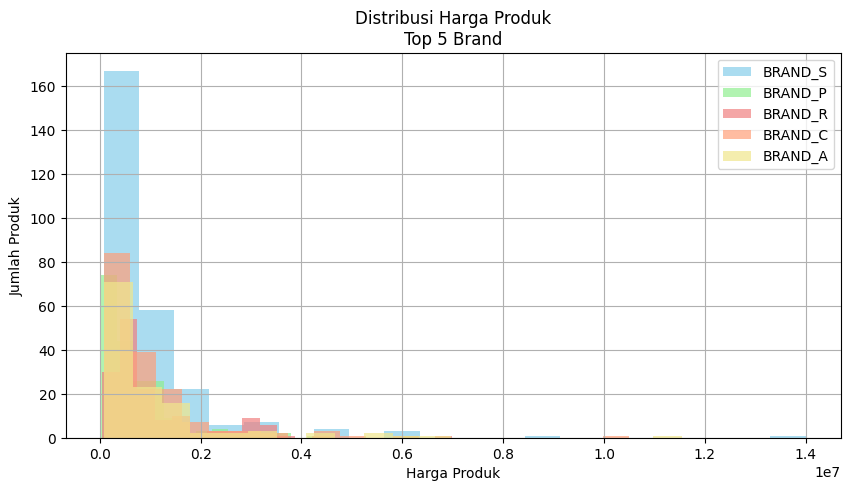

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset penjualan
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
dataset = pd.read_csv(url)

# Mengambil data penjualan untuk top 5 brand
top_5_brands = ['BRAND_S', 'BRAND_P', 'BRAND_R', 'BRAND_C', 'BRAND_A']
top_5_data = dataset[dataset['brand'].isin(top_5_brands)]

# Mengambil median harga per product_id
product_price_median = top_5_data.groupby('product_id')['item_price'].median().reset_index()

# Membuat histogram dengan warna berbeda untuk setiap brand
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'khaki']
plt.figure(figsize=(10, 5))
for i, brand in enumerate(top_5_brands):
    brand_data = product_price_median[product_price_median['product_id'].isin(top_5_data[top_5_data['brand'] == brand]['product_id'])]
    plt.hist(brand_data['item_price'], bins=20, color=colors[i], alpha=0.7, label=brand)

plt.xlabel('Harga Produk')
plt.ylabel('Jumlah Produk')
plt.title('Distribusi Harga Produk\nTop 5 Brand')
plt.legend()
plt.grid(True)
plt.show()


**Case 6a: Korelasi quantity vs GMV**

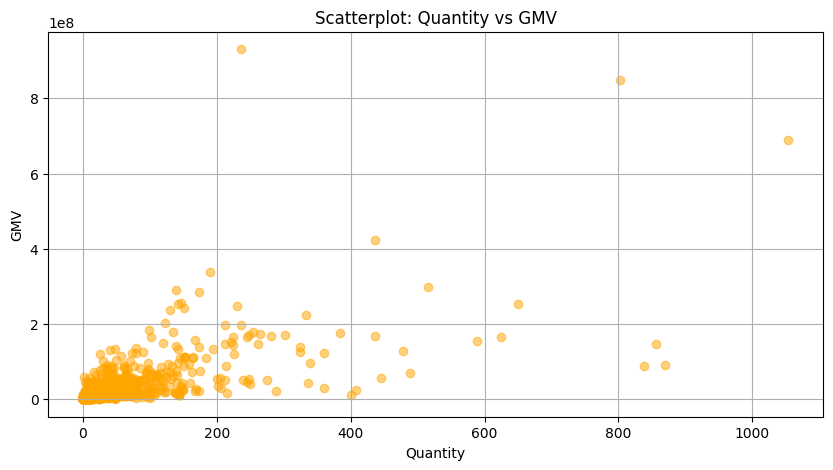

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset penjualan
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Menghitung GMV (quantity * item_price)
df['GMV'] = df['quantity'] * df['item_price']

# Mengambil dataset product_id, quantity, GMV, dan item_price
data_product = df.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()

# Scatterplot quantity vs GMV
plt.figure(figsize=(10, 5))
plt.scatter(data_product['quantity'], data_product['GMV'], color='orange', alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.title('Scatterplot: Quantity vs GMV')
plt.grid(True)
plt.show()


**Case 6b: Korelasi median harga vs quantity**

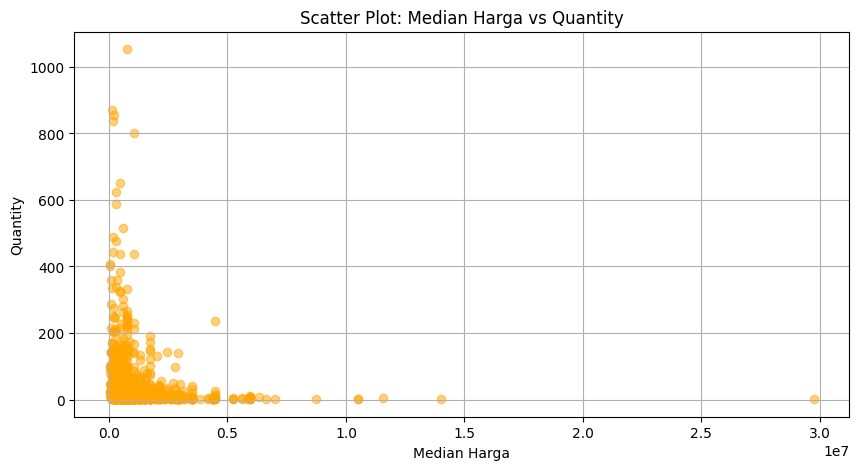

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset penjualan
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengambil dataset product_id, quantity, dan item_price
data_product = df.groupby('product_id').agg({'quantity': 'sum', 'item_price': 'median'}).reset_index()

# Scatter plot median harga vs quantity
plt.figure(figsize=(10, 5))
plt.scatter(data_product['item_price'], data_product['quantity'], c='orange', alpha=0.5)
plt.xlabel('Median Harga')
plt.ylabel('Quantity')
plt.title('Scatter Plot: Median Harga vs Quantity')
plt.grid(True)
plt.show()
